# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Week9/Country-data.csv", sep = ",")

In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters= 5
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

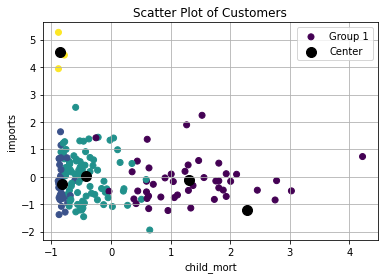

In [11]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 3


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [12]:
WCSS = []
Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters= k, n_init = 30, init = "random"
                , random_state=42).fit(X_scaled)
  WCSS.append(kmeans.inertia_)
WCSSs = [KMeans(n_clusters = k, n_init = 30, init = "random").fit(X_scaled).inertia_ for k in range(1,15)]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

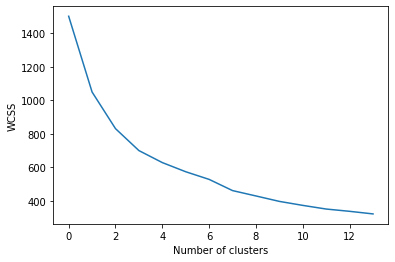

In [13]:
plt.plot(WCSSs)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

I'm interested in the difference between developed and developing countries, so I choose 2 clusters and see if the classification is correct.

In [14]:
kmeans = KMeans(n_clusters= 2
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [33]:
countries = ['Australia', 'Brazil', 'China',  'France', 'India','Pakistan', 'South Africa']
df_select = scaler.transform(df[df['country'].isin(countries)].drop(["country"], axis = 1))
df_class = kmeans.predict(df_select)
df_class

array([0, 0, 0, 0, 1, 1, 1], dtype=int32)

In [34]:
df[df['country'].isin(countries)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900
22,Brazil,19.8,10.7,9.01,11.8,14500,8.41,74.2,1.80,11200
34,China,15.7,26.3,5.07,22.6,9530,6.94,74.6,1.59,4560
54,France,4.2,26.8,11.90,28.1,36900,1.05,81.4,2.03,40600
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.60,1350
116,Pakistan,92.1,13.5,2.20,19.4,4280,10.90,65.3,3.85,1040
137,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280


From the result we can see, Kmeans effort classify Austrilia, Brazil, China and France as "Developped country", and classify India, Pakistan and South Africa as "Developping country", we can guess child_mortility rate and life-expectation should have huge influence.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [42]:
df['cluster'] = kmeans.predict(X_scaled)
#kmeans = KMeans.fit_predict(X_scaled)
#pred = pd.DataFrame(kmeans)
#output = pd.concat([pred,df],axis = 1)
#for i in range(2):
#    print(output[output[0] == i]['country'].tolist())

In [41]:
df.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


# Q7.) Write an observation about the descriptive statistics.

We can see from the table, "developped country" tend to have small child_mortility rate, low inflation rate, higher income and higher gdpp. But we should remember there may also be nonlinear relationship between features that influence clusters.